In [ ]:
!pip install transformers[torch]
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
!pip install evaluate
import evaluate
from transformers import RobertaTokenizer, RobertaForSequenceClassification, TrainingArguments, Trainer
from datasets import load_from_disk, load_dataset

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 21.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
df = pd.read_csv("/content/Feedback.csv")
df.head(30)

,text,sentiment
0,You have selected some technologies for the as...,Critical
1,The work lacks novelty and presentation,Critical
2,This work does not reflect an understanding of...,Critical
3,"Learning is never done without error, so you s...",Critical
4,I would have implemented the method using this...,Critical
5,Need to improve,Critical
6,"To be honest, this report is far behind my exp...",Critical
7,The report misses critical discussion and inte...,Critical
8,You missed to integrate technology in your ass...,Critical
9,I respect your effort to fulfill the assignmen...,Critical


In [ ]:
# Define a dictionary mapping sentiment labels to numeric values
sentiment_mapping = {
    "Neutral": 0,
    "Critical": 1,
    "Encouraging": 2
}

# Remove leading and trailing whitespace from sentiment values
df["sentiment"] = df["sentiment"].str.strip()

# Apply the mapping to the sentiment column
df["sentiment"] = df["sentiment"].map(sentiment_mapping)

# Print the DataFrame to verify the conversion
print(df)

                                                 text  sentiment
0   You have selected some technologies for the as...          1
1            The work lacks novelty and presentation           1
2   This work does not reflect an understanding of...          1
3   Learning is never done without error, so you s...          1
4   I would have implemented the method using this...          1
5                                     Need to improve          1
6   To be honest, this report is far behind my exp...          1
7   The report misses critical discussion and inte...          1
8   You missed to integrate technology in your ass...          1
9   I respect your effort to fulfill the assignmen...          1
10  This submission would have benefited from grea...          1
11  Although,  you have chosen good technologies f...          0
12  The work addresses challenge of the new problem.           0
13  Your work is somewhat okay, but it needs impro...          0
14  You are doing well, b

In [1]:
#splittind Dataset
train, test = train_test_split(df, test_size=0.2, random_state=42)
train,valid = train_test_split(train,test_size = 0.25, random_state = 42)

train.to_csv("train.csv", index=False)
test.to_csv("test.csv",index =False)
valid.to_csv("valid.csv",index =False)

NameError: name 'train_test_split' is not defined

In [ ]:
# import data set in DatasetDict format
df_train= load_dataset("csv", data_files="train.csv",split = "train")
df_test = load_dataset("csv", data_files="test.csv", split = "train")
df_valid = load_dataset("csv", data_files= "valid.csv", split = "train")
print(df_train)

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset({
    features: ['text', 'sentiment'],
    num_rows: 19
})


In [ ]:
# encoding with Roberta Tokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
train_tokenized = df_train.map(lambda batch: tokenizer(batch['text'], padding='max_length', truncation=True, max_length=32))
test_tokenized = df_test.map(lambda batch: tokenizer(batch['text'], padding='max_length', truncation=True, max_length=32))
valid_tokenized = df_valid.map(lambda batch: tokenizer(batch["text"], padding='max_length', truncation=True, max_length = 32))

train_tokenized = train_tokenized.rename_column("sentiment", "labels")
test_tokenized = test_tokenized.rename_column("sentiment", "labels")
valid_tokenized = valid_tokenized.rename_column("sentiment", "labels")

train_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
test_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "labels"])
valid_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/19 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

Map:   0%|          | 0/7 [00:00<?, ? examples/s]

In [ ]:
# load model and tokenizer
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# dynmaic padding
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)


In [ ]:
# train the model
training_args = TrainingArguments(
    output_dir='/path',          # output directory
    num_train_epochs=10,              # total number of training epochs
    per_device_train_batch_size=16,  # batch size per device during training
    per_device_eval_batch_size=16,   # batch size for evaluation
    warmup_steps=0,                # number of warmup steps for learning rate scheduler
    learning_rate=5e-5,               # learning rate
    logging_dir='./logs',            # directory for storing logs
    logging_steps=1000,
)

metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)


trainer = Trainer(
   model=model,
   args=training_args,
   train_dataset=train_tokenized,
   eval_dataset=valid_tokenized,
   data_collator=data_collator,  # Add data collator for dynamic padding
   tokenizer=tokenizer,
   compute_metrics=compute_metrics,
)

trainer.train()


Step,Training Loss


TrainOutput(global_step=20, training_loss=0.9248826026916503, metrics={'train_runtime': 111.2513, 'train_samples_per_second': 1.708, 'train_steps_per_second': 0.18, 'total_flos': 3124471835520.0, 'train_loss': 0.9248826026916503, 'epoch': 10.0})

In [ ]:
# get prediction for test data set
pred = trainer.predict(test_tokenized) # get prediction output
prediction = pred[0].argmax(axis=1) # transform logits to compare with the original label
original = pred[1]
accuracy = evaluate.load('accuracy')
f1 = evaluate.load('f1')
accuracy.compute(predictions=prediction, references=original) #0.428
f1.compute(predictions=prediction, references=original, average='weighted') # 0.428


{'f1': 0.42857142857142855}

In [ ]:
# Get prediction for test data set
pred = trainer.predict(test_tokenized) # get prediction output
prediction = pred[0].argmax(axis=1) # transform logits to compare with the original label
original = pred[1]

# Load evaluation metrics
accuracy = evaluate.load('accuracy')
f1 = evaluate.load('f1')

# Compute accuracy and print
accuracy_score = accuracy.compute(predictions=prediction, references=original)
print("Accuracy:", accuracy_score)

# Compute F1 score and print
f1_score = f1.compute(predictions=prediction, references=original, average='weighted')
print("F1 Score:", f1_score)

from sklearn.metrics import precision_score, recall_score, confusion_matrix

# Get prediction for test data set
pred = trainer.predict(test_tokenized)
prediction = pred[0].argmax(axis=1)
original = pred[1]

# Compute precision
precision = precision_score(original, prediction, average='weighted')

# Compute recall
recall = recall_score(original, prediction, average='weighted')

# Compute confusion matrix
conf_matrix = confusion_matrix(original, prediction)

# Calculate specificity
specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

# Print metrics
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("Confusion Matrix:")
print(conf_matrix)



Accuracy: {'accuracy': 0.42857142857142855}
F1 Score: {'f1': 0.42857142857142855}


Precision: 0.4523809523809524
Recall: 0.42857142857142855
Specificity: 0.5
Confusion Matrix:
[[1 1 1]
 [0 1 1]
 [1 0 1]]


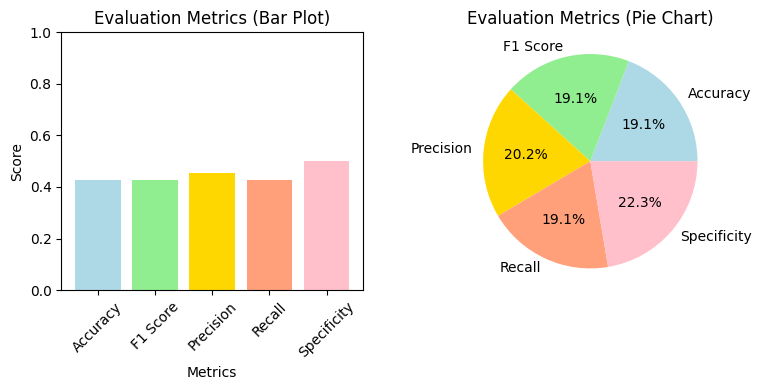

In [ ]:
import matplotlib.pyplot as plt

# Metrics
accuracy = 0.42857142857142855
f1_score = 0.42857142857142855
precision = 0.4523809523809524
recall = 0.42857142857142855
specificity = 0.5

# Labels
labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'Specificity']

# Values
values = [accuracy, f1_score, precision, recall, specificity]

# Bar plot
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.bar(labels, values, color=['#ADD8E6', '#90EE90', '#FFD700', '#FFA07A', '#FFC0CB'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics (Bar Plot)')
plt.ylim(0, 1)  # Set y-axis limit to ensure appropriate scale
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


In [ ]:
result = df.to_csv("result.csv") # save the data

In [ ]:
# Load the trained model and tokenizer
import torch
output_dir = "/path"
model = RobertaForSequenceClassification.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Sample example texts
sample_texts = ["Great effort on your assignment! You've demonstrated a clear understanding of the topic and provided insightful analysis.",
                "Your work lacks depth and fails to address key aspects of the topic. Improvement is needed to meet the assignment requirements.",
                "Your assignment meets the basic expectations but could benefit from further elaboration and critical analysis.",
                "To be honest, this report is far behind my expectations. You have not complied with the criteria listed in the assessment brief and missed marks.",
                "Although,  you have chosen good technologies for the assessment but lack of enough justifications is evident",
                " You have done a good job by selecting appropriate technologies to complete the assessment. well done.",
                "The work lacks novelty and presentation ",
                "Your report shows a basic level of knowledge. There are some areas I have highlighted in your report which can be improved."


]

# Preprocess sample examples
tokenized_samples = tokenizer(sample_texts, padding='max_length', truncation=True, max_length=32, return_tensors='pt')

# Predict sentiment for sample examples
with torch.no_grad():
    outputs = model(**tokenized_samples)

# Convert logits to predictions
predictions = np.argmax(outputs.logits, axis=1)

# Print predictions
for text, prediction in zip(sample_texts, predictions):
    print(f"Text: {text}\nPredicted Sentiment: {prediction}")


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: Great effort on your assignment! You've demonstrated a clear understanding of the topic and provided insightful analysis.
Predicted Sentiment: 1
Text: Your work lacks depth and fails to address key aspects of the topic. Improvement is needed to meet the assignment requirements.
Predicted Sentiment: 1
Text: Your assignment meets the basic expectations but could benefit from further elaboration and critical analysis.
Predicted Sentiment: 1
Text: To be honest, this report is far behind my expectations. You have not complied with the criteria listed in the assessment brief and missed marks.
Predicted Sentiment: 1
Text: Although,  you have chosen good technologies for the assessment but lack of enough justifications is evident
Predicted Sentiment: 1
Text:  You have done a good job by selecting appropriate technologies to complete the assessment. well done.
Predicted Sentiment: 1
Text: The work lacks novelty and presentation 
Predicted Sentiment: 1
Text: Your report shows a basic level